In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


dataset size:  (265703, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Data for  200 observers and  36  stimuli.
Mean fixation number:  37.13  +/-  10.07
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7171
Mean X location:  476.8  +/-  91.6  pixels
Mean Y location:  465.5  +/-  64.9  pixels
Mean saccade  amplitude:  81.1  +/-  20.0  pixels
Mean scanpath  length:  2549.3  +/-  649.7  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  37.13  +/-  10.07
Mean fixation duration:  382.9  +/-  67.3 msec
Num of trials with zero fixations: 0
Num valid trials  7171
Mean X location:  476.8  +/-  91.6  pixels
Mean Y location:  465.5  +/-  64.9  pixels
Mean saccade  amplitude:  81.1  +/-  20.0  pixels
Mean scanpath  length:  2549.3  +/-  649.7  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

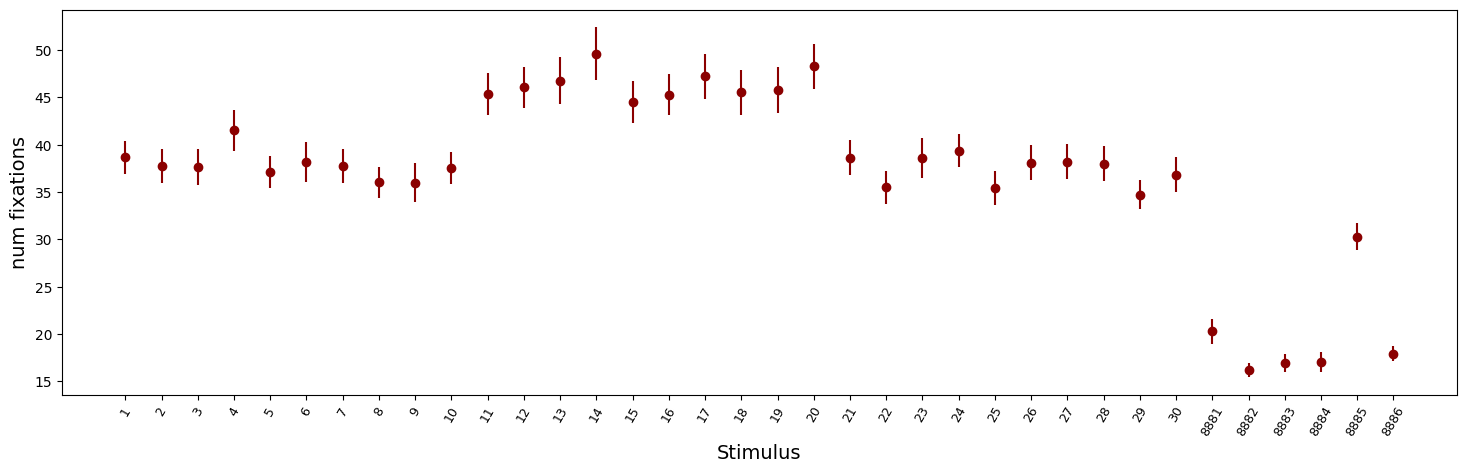

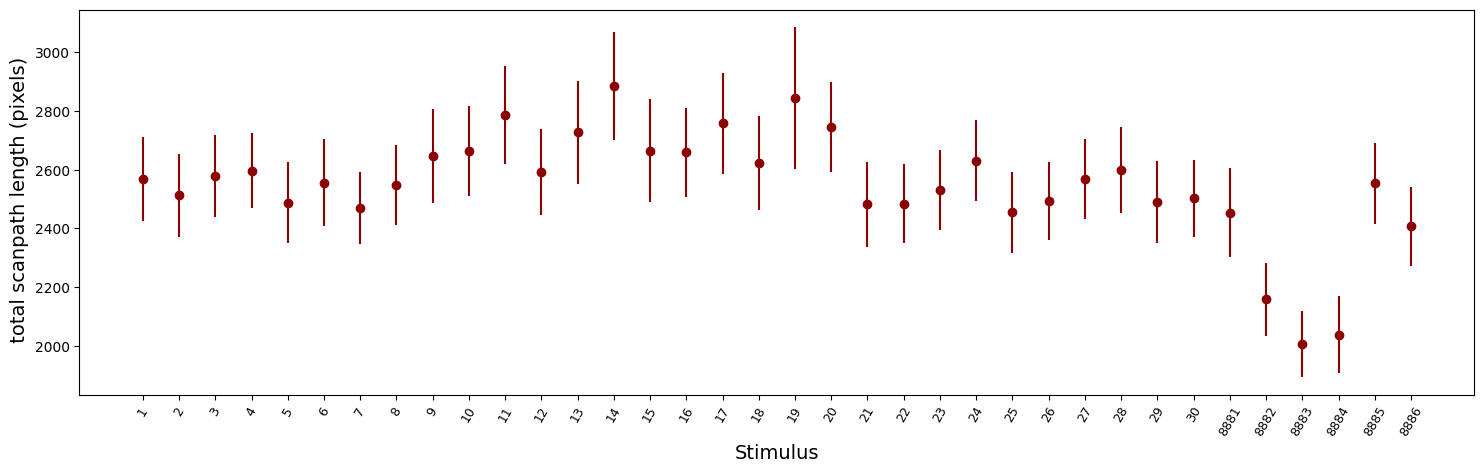

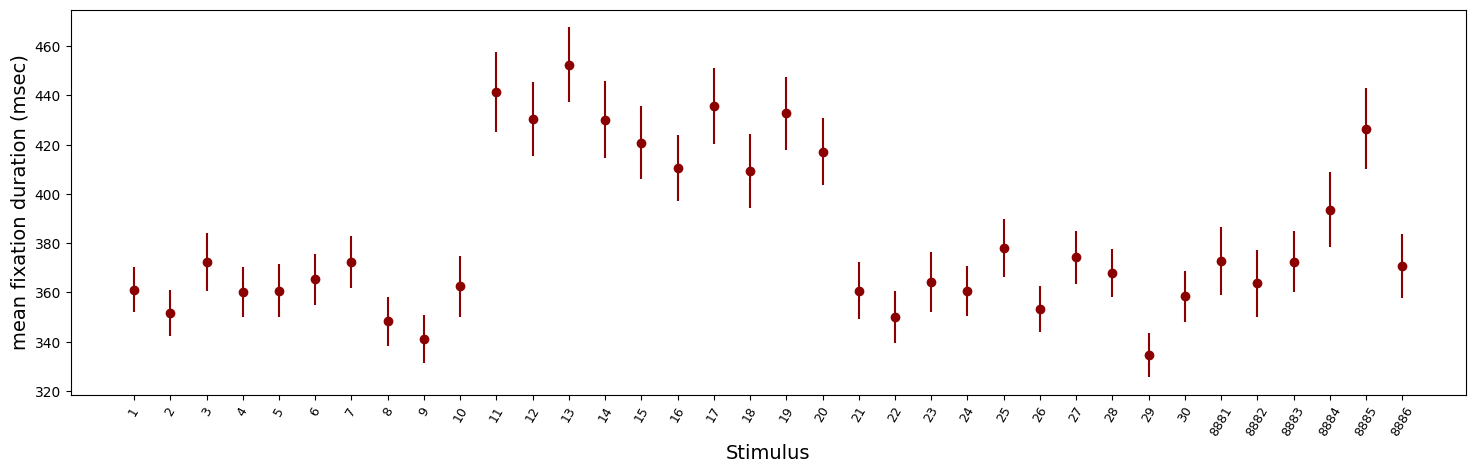

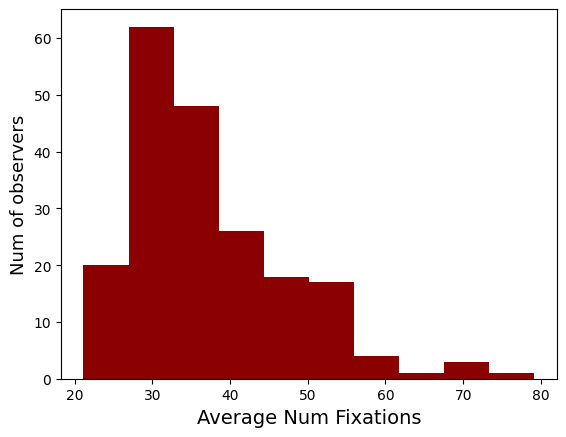

In [6]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1, duration=1)

---

In [7]:
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [8]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')
WhichCN = np.array(WhichCN, dtype=float)
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

Conditions [ 1.  2.  3.  4. nan]


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [9]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [10]:
def vis_det(stimuli, final_title='Saccade Angle Distribution'):
    Cond = WhichCN
    bin_edges_deg = np.arange(0, 361, 1)
    bin_edges = np.deg2rad(bin_edges_deg)

    if not isinstance(stimuli, np.ndarray):
        stimuli = [stimuli]

    zones = [
        ("0–45° & 315–360°", 0, 45, 315, 360),  # Two separate ranges
        ("135–225°", 135, 225, None, None)       # Single range
    ]

    groups = np.unique(Cond)
    group_n_subjects = [np.sum(Cond == g) for g in groups]

    for zone_info in zones:
        label = zone_info[0]
        amin1, amax1 = zone_info[1], zone_info[2]
        amin2, amax2 = zone_info[3], zone_info[4]
        is_split = (amin2 is not None and amax2 is not None)

        ang0 = []
        ang1 = []


        for i, s in enumerate(DyslexiaDat.stimuli):
            if s in stimuli:
                for group in groups:
                    angles = []
                    data = Saccades[Cond == group, i, :, :]
                    for subj in data:
                        H, V = subj.shape
                        for h in range(H):
                            for v in range(V):
                                for val in subj[h, v]:
                                    if np.isnan(val):
                                        continue
                                    deg = val % 360
                                    # Keep only within the visible zone(s)
                                    if is_split:
                                        # For 0-45 and 315-360
                                        if (amin1 <= deg <= amax1) or (amin2 <= deg <= amax2):
                                            angles.append(np.deg2rad(deg))
                                    else:
                                        # For single range like 135-225
                                        if amin1 <= deg <= amax1:
                                            angles.append(np.deg2rad(deg))
                    if group == 0:
                        ang0.extend(angles)
                    else:
                        ang1.extend(angles)

        fig = plt.figure(figsize=(12, 5))
        fig.suptitle(f'{final_title}: Angles in {label}', fontsize=16)

        # Compute normalized histograms first
        counts0, _ = np.histogram(ang0, bins=bin_edges)
        counts1, _ = np.histogram(ang1, bins=bin_edges)
        counts0_norm = counts0 / group_n_subjects[0]
        counts1_norm = counts1 / group_n_subjects[1]
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        for idx, (ang, title) in enumerate(zip([ang0, ang1, None],
                                            ['Control (Group 0)', 'Dyslexic (Group 1)', 'Overlay'])):
            ax = fig.add_subplot(1, 3, idx + 1, projection='polar')

            if title == 'Overlay':
                ax.bar(bin_centers, counts0_norm, width=np.diff(bin_edges), alpha=0.6, label='0')
                ax.bar(bin_centers, counts1_norm, width=np.diff(bin_edges), alpha=0.6, label='1')
                ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05))
            elif title.startswith('Control'):
                ax.bar(bin_centers, counts0_norm, width=np.diff(bin_edges))
            else:
                ax.bar(bin_centers, counts1_norm, width=np.diff(bin_edges))

            if is_split:
                ax.set_thetamin(-45)
                ax.set_thetamax(45)
                
                # Set custom tick labels
                tick_positions = np.deg2rad([-45, -30, -15, 0, 15, 30, 45])
                ax.set_xticks(tick_positions)
                ax.set_xticklabels(['315°', '330°', '345°', '0°', '15°', '30°', '45°'])
            else:
                
                # Set angular limits
                ax.set_thetamin(135)
                ax.set_thetamax(225)
                
                # Set custom tick labels for this range
                tick_positions = np.deg2rad([135, 150, 165, 180, 195, 210, 225])
                ax.set_xticks(tick_positions)
                ax.set_xticklabels(['135°', '150°', '165°', '180°', '195°', '210°', '225°'])

            ax.set_title(title)

        plt.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

In [11]:
def show_statistic(ang0, ang1, n0, n1, size0, size1):    
    ang0_arr = np.array(ang0)
    ang1_arr = np.array(ang1)
    mean0 = np.arctan2(np.mean(np.sin(ang0_arr)), np.mean(np.cos(ang0_arr)))
    mean1 = np.arctan2(np.mean(np.sin(ang1_arr)), np.mean(np.cos(ang1_arr)))
    R0 = np.sqrt(np.mean(np.sin(ang0_arr))**2 + np.mean(np.cos(ang0_arr))**2)
    R1 = np.sqrt(np.mean(np.sin(ang1_arr))**2 + np.mean(np.cos(ang1_arr))**2)
    std0 = np.sqrt(-2 * np.log(R0))
    std1 = np.sqrt(-2 * np.log(R1))

    print(f"\nStatistics:")
    print(f"Control (Group 0):")
    print(f"  N = {n0}")
    print(f"  AVG N = {n0/size0}")
    print(f"  Mean = {np.rad2deg(mean0):.2f}° ({mean0:.4f} rad)")
    print(f"  Std = {np.rad2deg(std0):.2f}° ({std0:.4f} rad)")
    print(f"Dyslexic (Group 1):")
    print(f"  N = {n1}")
    print(f"  AVG N = {n1/size1}")
    print(f"  Mean = {np.rad2deg(mean1):.2f}° ({mean1:.4f} rad)")
    print(f"  Std = {np.rad2deg(std1):.2f}° ({std1:.4f} rad)")
    print("-" * 50)

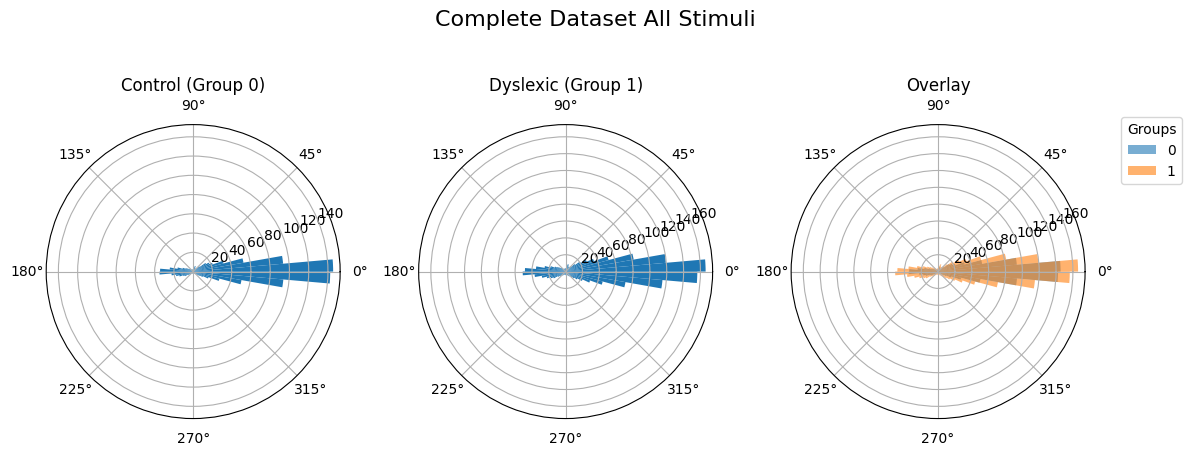


Statistics:
Control (Group 0):
  N = 130856
  AVG N = 1099.6302521008404
  Mean = 2.66° (0.0464 rad)
  Std = 70.92° (1.2377 rad)
Dyslexic (Group 1):
  N = 127007
  AVG N = 1567.9876543209878
  Mean = 0.98° (0.0171 rad)
  Std = 77.50° (1.3526 rad)
--------------------------------------------------


In [12]:
# Precompute bin edges in radians (0° to 360° in 5° steps)
bin_edges_deg = np.arange(0, 361, 5)
bin_edges = np.deg2rad(bin_edges_deg)

# --- Collect all angles across all stimuli ---
groups = np.unique(WhichCN)
group_angles = [[] for _ in groups]  # One list per group

# Count subjects per group for normalization
group_n_subjects = [np.sum(WhichCN == g) for g in groups]

for i, stim in enumerate(DyslexiaDat.stimuli):
    for group_idx, group in enumerate(groups):
        data = Saccades[WhichCN == group, i, :, :]
        for subj in data:
            H, V = subj.shape
            for h in range(H):
                for v in range(V):
                    vals = subj[h, v]
                    group_angles[group_idx].extend(np.deg2rad(vals[~np.isnan(vals)]))

# Unpack angles
ang0, ang1 = group_angles
n0, n1 = len(ang0), len(ang1)

# ---- Circular histograms ----
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Complete Dataset All Stimuli', fontsize=16)

ax0 = fig.add_subplot(131, projection='polar')
counts0, _, _ = ax0.hist(ang0, bins=bin_edges, density=False)
ax0.clear()  # Clear the auto-plotted hist
ax0.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    align='center'
)
ax0.set_title(f'Control (Group 0)')

# b) group 1
ax1 = fig.add_subplot(132, projection='polar')
counts1, _, _ = ax1.hist(ang1, bins=bin_edges, density=False)
ax1.clear()
ax1.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    align='center'
)
ax1.set_title(f'Dyslexic (Group 1)')

# c) overlay
ax2 = fig.add_subplot(133, projection='polar')
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'0'
)
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'1'
)
ax2.set_title('Overlay')
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), title='Groups')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

show_statistic(ang0, ang1, n0, n1, group_n_subjects[0], group_n_subjects[1])

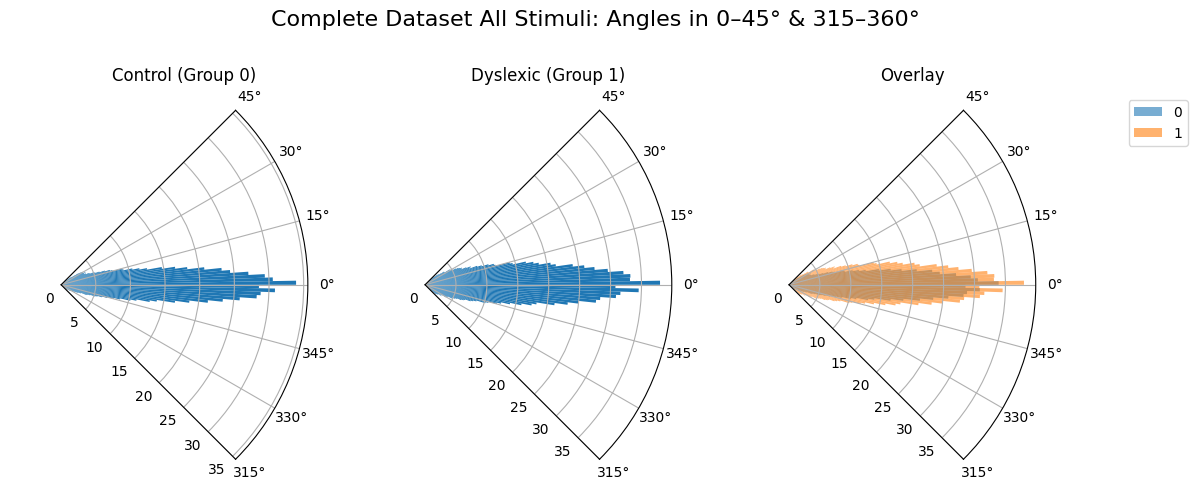

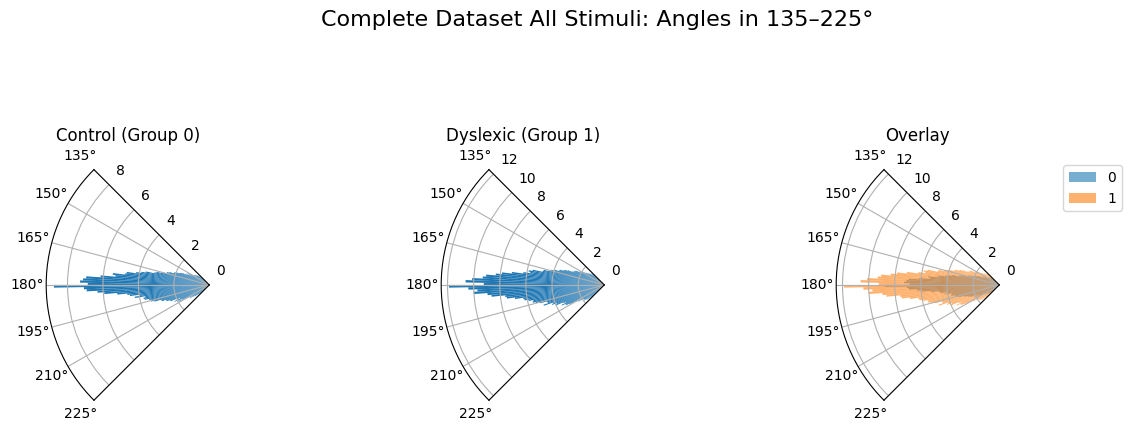

In [63]:
vis_det(DyslexiaDat.stimuli, final_title='Complete Dataset All Stimuli')

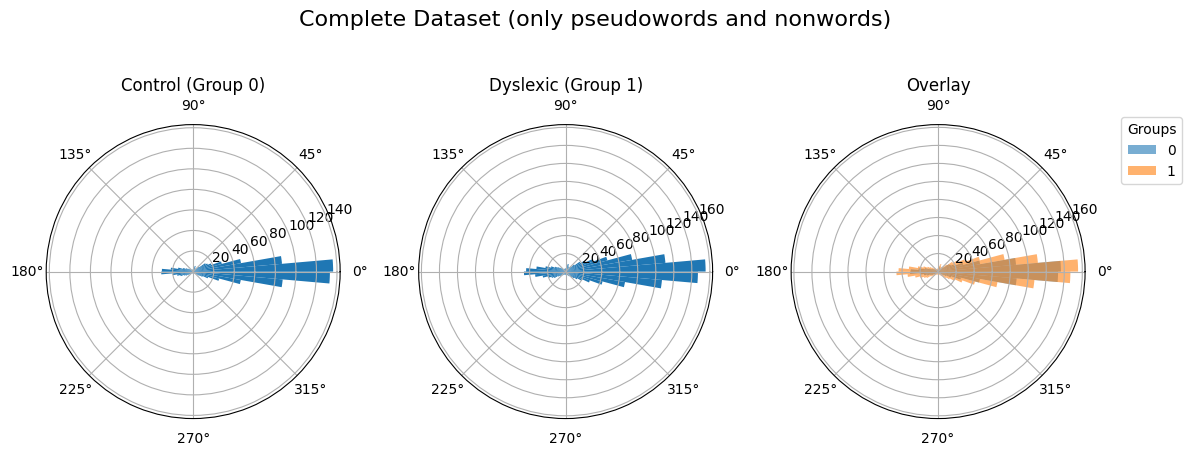


Statistics:
Control (Group 0):
  N = 119015
  AVG N = 1000.1260504201681
  Mean = 2.60° (0.0454 rad)
  Std = 69.38° (1.2109 rad)
Dyslexic (Group 1):
  N = 116486
  AVG N = 1438.0987654320988
  Mean = 0.94° (0.0164 rad)
  Std = 76.55° (1.3360 rad)
--------------------------------------------------


In [18]:
# Precompute bin edges in radians (0° to 360° in 5° steps)
bin_edges_deg = np.arange(0, 361, 5)
bin_edges = np.deg2rad(bin_edges_deg)

# --- Collect all angles across all stimuli ---
groups = np.unique(WhichCN)
group_angles = [[] for _ in groups]  # One list per group

for i, stim in enumerate(DyslexiaDat.stimuli):
    if stim in DyslexiaDat.stimuli[:-6]:
        for group_idx, group in enumerate(groups):
            data = Saccades[WhichCN == group, i, :, :]
            for subj in data:
                H, V = subj.shape
                for h in range(H):
                    for v in range(V):
                        vals = subj[h, v]
                        group_angles[group_idx].extend(np.deg2rad(vals[~np.isnan(vals)]))

# Unpack angles
ang0, ang1 = group_angles
n0, n1 = len(ang0), len(ang1)

# ---- Circular histograms ----
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Complete Dataset (only pseudowords and nonwords)', fontsize=16)

ax0 = fig.add_subplot(131, projection='polar')
counts0, _, _ = ax0.hist(ang0, bins=bin_edges, density=False)
ax0.clear()  # Clear the auto-plotted hist
ax0.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    align='center'
)
ax0.set_title(f'Control (Group 0)')

# b) group 1
ax1 = fig.add_subplot(132, projection='polar')
counts1, _, _ = ax1.hist(ang1, bins=bin_edges, density=False)
ax1.clear()
ax1.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    align='center'
)
ax1.set_title(f'Dyslexic (Group 1)')

# c) overlay
ax2 = fig.add_subplot(133, projection='polar')
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'0'
)
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'1'
)
ax2.set_title('Overlay')
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), title='Groups')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

show_statistic(ang0, ang1, n0, n1, group_n_subjects[0], group_n_subjects[1])

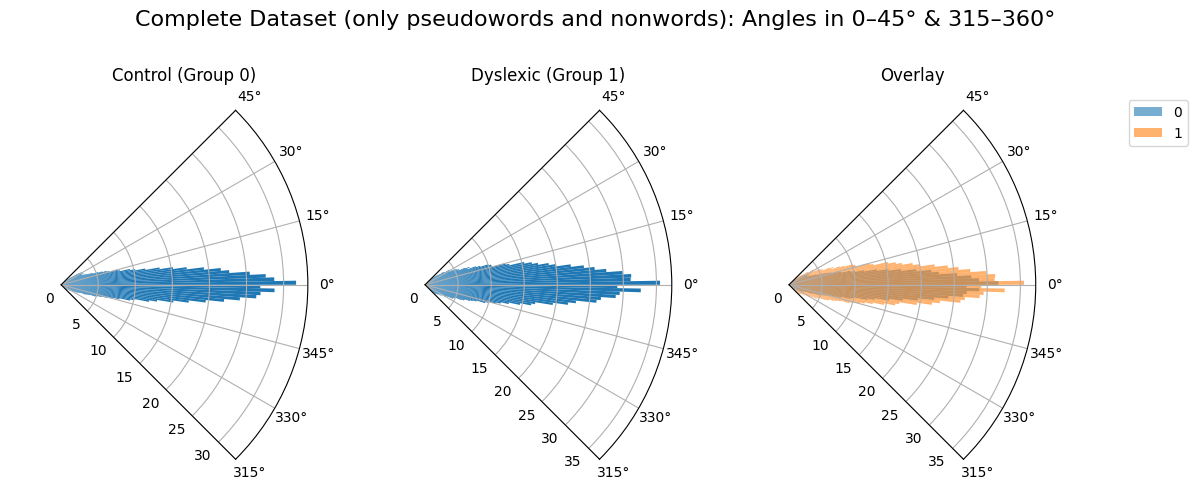

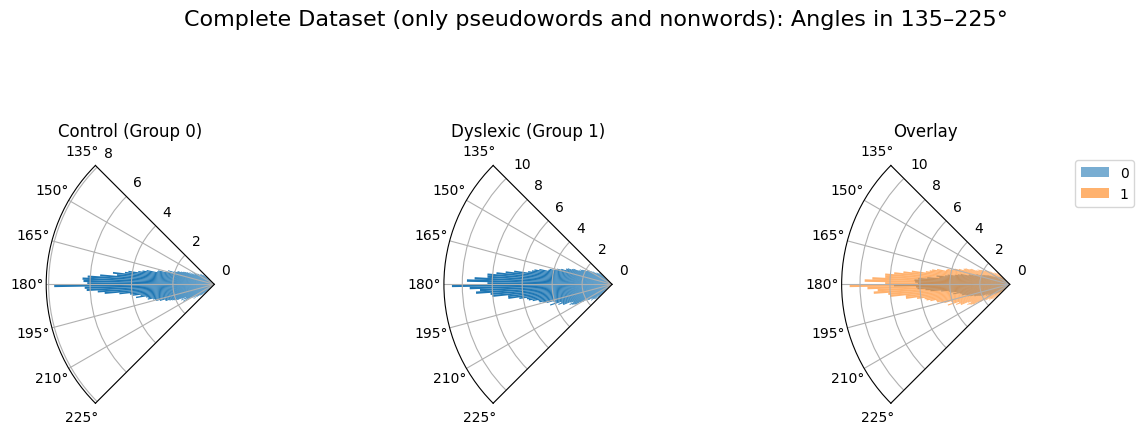

In [65]:
vis_det(DyslexiaDat.stimuli[:-6], final_title='Complete Dataset (only pseudowords and nonwords)')

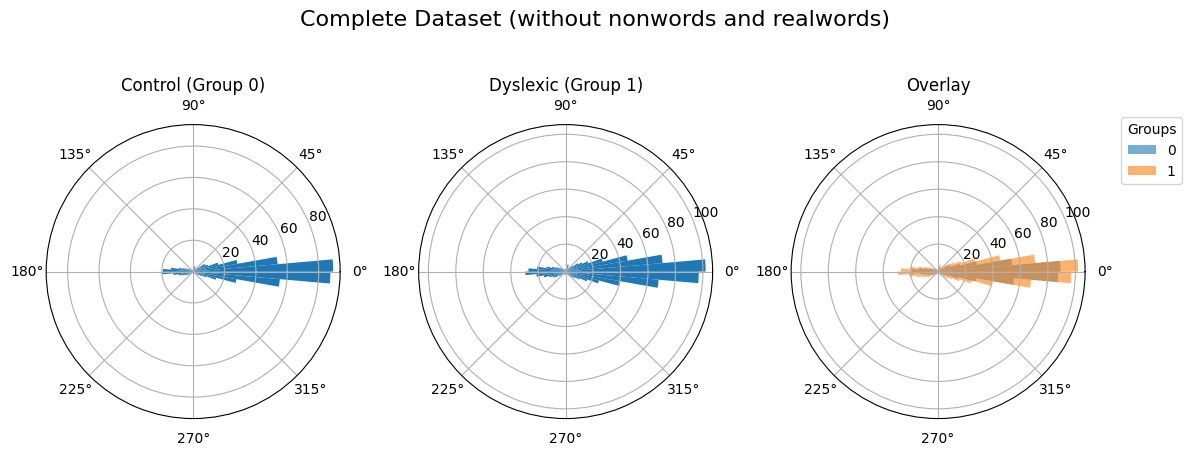


Statistics:
Control (Group 0):
  N = 73814
  AVG N = 620.2857142857143
  Mean = 2.77° (0.0483 rad)
  Std = 69.26° (1.2089 rad)
Dyslexic (Group 1):
  N = 71679
  AVG N = 884.925925925926
  Mean = 1.05° (0.0184 rad)
  Std = 75.96° (1.3258 rad)
--------------------------------------------------


In [13]:
# Precompute bin edges in radians (0° to 360° in 5° steps)
bin_edges_deg = np.arange(0, 361, 5)
bin_edges = np.deg2rad(bin_edges_deg)

# --- Collect all angles across all stimuli ---
groups = np.unique(WhichCN)
group_angles = [[] for _ in groups]  # One list per group

for i, stim in enumerate(DyslexiaDat.stimuli):
    if stim in np.append(DyslexiaDat.stimuli[:10], DyslexiaDat.stimuli[20:30]):
        for group_idx, group in enumerate(groups):
            data = Saccades[WhichCN == group, i, :, :]
            for subj in data:
                H, V = subj.shape
                for h in range(H):
                    for v in range(V):
                        vals = subj[h, v]
                        group_angles[group_idx].extend(np.deg2rad(vals[~np.isnan(vals)]))

# Unpack angles
ang0, ang1 = group_angles
n0, n1 = len(ang0), len(ang1)

# ---- Circular histograms ----
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Complete Dataset (without nonwords and realwords)', fontsize=16)

ax0 = fig.add_subplot(131, projection='polar')
counts0, _, _ = ax0.hist(ang0, bins=bin_edges, density=False)
ax0.clear()  # Clear the auto-plotted hist
ax0.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    align='center'
)
ax0.set_title(f'Control (Group 0)')

# b) group 1
ax1 = fig.add_subplot(132, projection='polar')
counts1, _, _ = ax1.hist(ang1, bins=bin_edges, density=False)
ax1.clear()
ax1.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    align='center'
)
ax1.set_title(f'Dyslexic (Group 1)')

# c) overlay
ax2 = fig.add_subplot(133, projection='polar')
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'0'
)
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'1'
)
ax2.set_title('Overlay')
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), title='Groups')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

show_statistic(ang0, ang1, n0, n1, group_n_subjects[0], group_n_subjects[1])

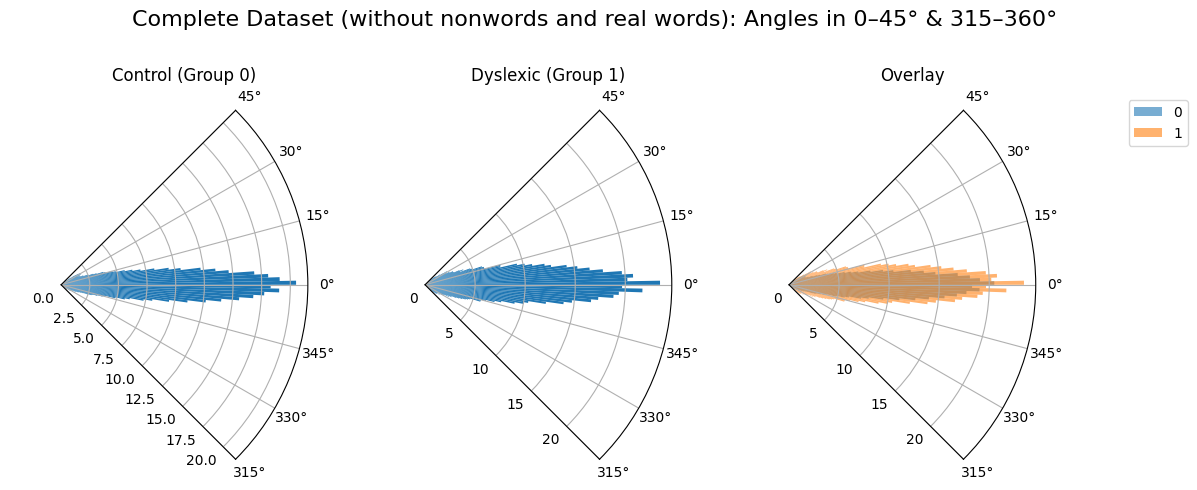

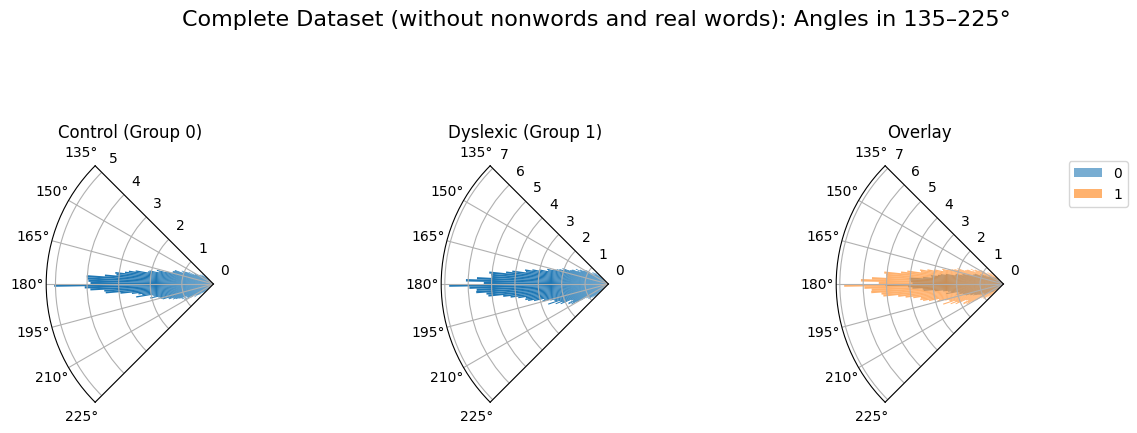

In [14]:
vis_det(np.append(DyslexiaDat.stimuli[:10], DyslexiaDat.stimuli[20:30]), final_title='Complete Dataset (without nonwords and real words)')

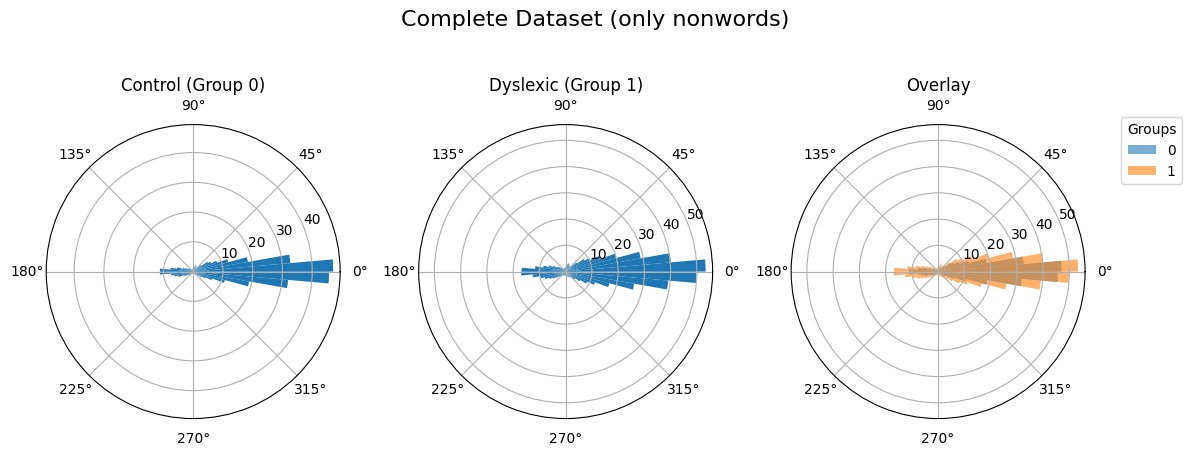


Statistics:
Control (Group 0):
  N = 45201
  AVG N = 379.84033613445376
  Mean = 2.33° (0.0407 rad)
  Std = 69.57° (1.2142 rad)
Dyslexic (Group 1):
  N = 44807
  AVG N = 553.1728395061729
  Mean = 0.76° (0.0132 rad)
  Std = 77.49° (1.3524 rad)
--------------------------------------------------


In [19]:
# Precompute bin edges in radians (0° to 360° in 5° steps)
bin_edges_deg = np.arange(0, 361, 5)
bin_edges = np.deg2rad(bin_edges_deg)

# --- Collect all angles across all stimuli ---
groups = np.unique(WhichCN)
group_angles = [[] for _ in groups]  # One list per group

for i, stim in enumerate(DyslexiaDat.stimuli):  # Only nonwords
    if stim in DyslexiaDat.stimuli[10:20]:
        for group_idx, group in enumerate(groups):
            data = Saccades[WhichCN == group, i, :, :]
            for subj in data:
                H, V = subj.shape
                for h in range(H):
                    for v in range(V):
                        vals = subj[h, v]
                        group_angles[group_idx].extend(np.deg2rad(vals[~np.isnan(vals)]))

# Unpack angles
ang0, ang1 = group_angles
n0, n1 = len(ang0), len(ang1)

# ---- Circular histograms ----
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Complete Dataset (only nonwords)', fontsize=16)

ax0 = fig.add_subplot(131, projection='polar')
counts0, _, _ = ax0.hist(ang0, bins=bin_edges, density=False)
ax0.clear()  # Clear the auto-plotted hist
ax0.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    align='center'
)
ax0.set_title(f'Control (Group 0)')

# b) group 1
ax1 = fig.add_subplot(132, projection='polar')
counts1, _, _ = ax1.hist(ang1, bins=bin_edges, density=False)
ax1.clear()
ax1.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    align='center'
)
ax1.set_title(f'Dyslexic (Group 1)')

# c) overlay
ax2 = fig.add_subplot(133, projection='polar')
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'0'
)
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'1'
)
ax2.set_title('Overlay')
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), title='Groups')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

show_statistic(ang0, ang1, n0, n1, group_n_subjects[0], group_n_subjects[1])


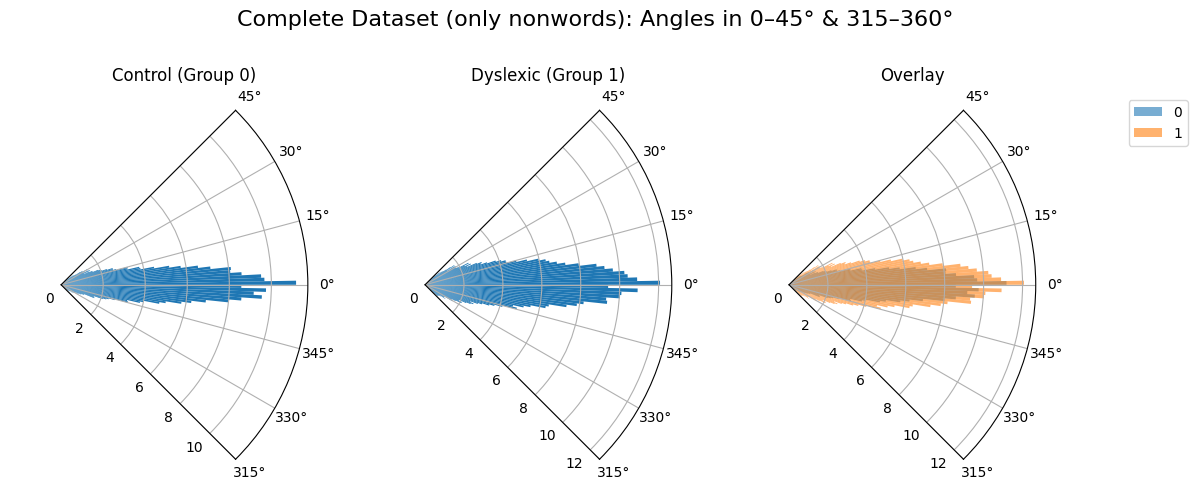

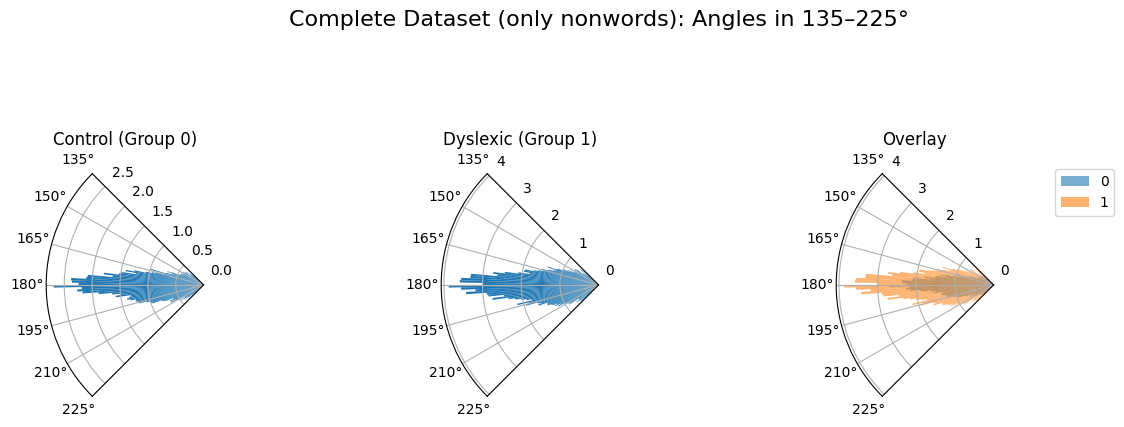

In [69]:
vis_det(DyslexiaDat.stimuli[10:20], final_title='Complete Dataset (only nonwords)')

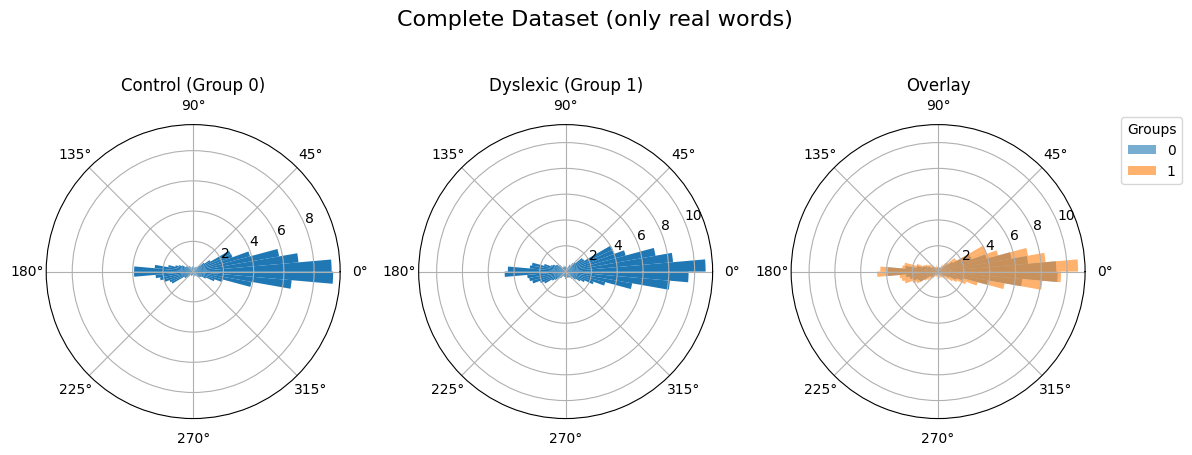


Statistics:
Control (Group 0):
  N = 11841
  AVG N = 99.50420168067227
  Mean = 3.54° (0.0618 rad)
  Std = 87.82° (1.5328 rad)
Dyslexic (Group 1):
  N = 10521
  AVG N = 129.88888888888889
  Mean = 1.52° (0.0265 rad)
  Std = 88.87° (1.5510 rad)
--------------------------------------------------


In [20]:
# Precompute bin edges in radians (0° to 360° in 5° steps)
bin_edges_deg = np.arange(0, 361, 5)
bin_edges = np.deg2rad(bin_edges_deg)

# --- Collect all angles across all stimuli ---
groups = np.unique(WhichCN)
group_angles = [[] for _ in groups]  # One list per group

for i, stim in enumerate(DyslexiaDat.stimuli):  # Only nonwords
    if stim in DyslexiaDat.stimuli[30:]:
        for group_idx, group in enumerate(groups):
            data = Saccades[WhichCN == group, i, :, :]
            for subj in data:
                H, V = subj.shape
                for h in range(H):
                    for v in range(V):
                        vals = subj[h, v]
                        group_angles[group_idx].extend(np.deg2rad(vals[~np.isnan(vals)]))

# Unpack angles
ang0, ang1 = group_angles
n0, n1 = len(ang0), len(ang1)

# ---- Circular histograms ----
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Complete Dataset (only real words)', fontsize=16)

ax0 = fig.add_subplot(131, projection='polar')
counts0, _, _ = ax0.hist(ang0, bins=bin_edges, density=False)
ax0.clear()  # Clear the auto-plotted hist
ax0.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    align='center'
)
ax0.set_title(f'Control (Group 0)')

# b) group 1
ax1 = fig.add_subplot(132, projection='polar')
counts1, _, _ = ax1.hist(ang1, bins=bin_edges, density=False)
ax1.clear()
ax1.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    align='center'
)
ax1.set_title(f'Dyslexic (Group 1)')

# c) overlay
ax2 = fig.add_subplot(133, projection='polar')
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts0 / group_n_subjects[0],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'0'
)
ax2.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,
    counts1 / group_n_subjects[1],
    width=np.diff(bin_edges),
    alpha=0.6,
    align='center',
    label=f'1'
)
ax2.set_title('Overlay')
ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), title='Groups')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

show_statistic(ang0, ang1, n0, n1, group_n_subjects[0], group_n_subjects[1])

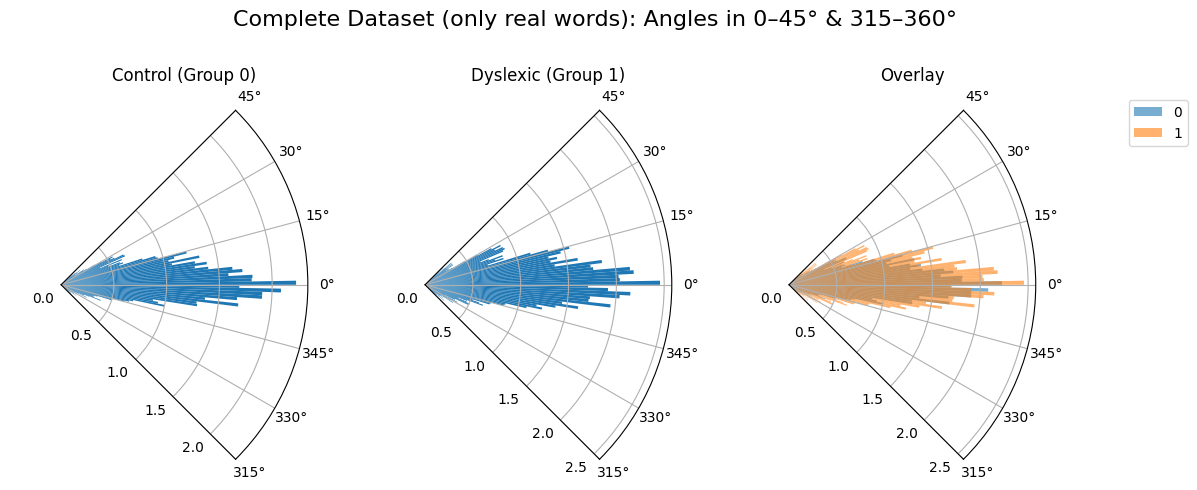

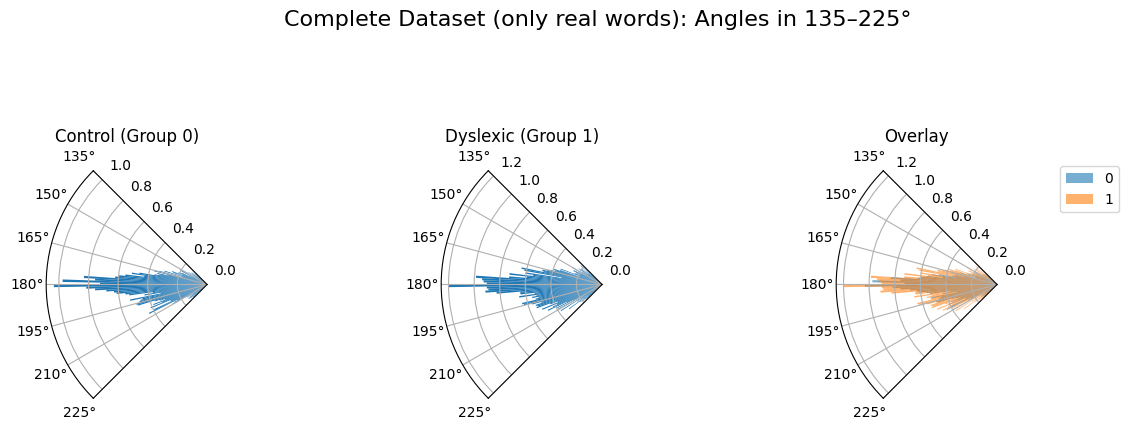

In [71]:
vis_det(DyslexiaDat.stimuli[30:], final_title='Complete Dataset (only real words)')